# TODO
1. 全体
 1.  openとcloseの時間を調べる  
 1. 変数表の作成　
 1. 設計の作成　
1. AI
 1. 済)chie2 による特徴量を選択
 1. 済)Sckit-learn のmodelで比較
 1. 済)Confution matrix
 1. pipline にて比較
 1. １０月分の前処理と、OANDA API v20
 
1. UI
 1. UIの検討
 

API化
http://www.algo-fx-blog.com/oanda-api-v20-open-account/

## Program Flow

1. モジュールインポート


In [102]:
# 変数定義
pram_predict_days=     [-5,-3,-2,-1]   #予想日(-1,-2,-3,-5日後)
pram_predict_percents= [0.5,1,2,3]   #数日後の何パーセント上昇するかを当てる(+0.5,1,2,3%)
pram_buymodes=         ["buy",""]  # 購入モードの変更　buyの場合は、買ったらその日にすぐに売る
pram_predict_day=1                 #予測は当日
pram_predict_percent=0.3
pram_traing_rate=0.5       #トレーニングデータとテストデータの比率


pram_epoch=30
model_name="TEST"               #保存するモデルファイル名
pram_buymode="" 

YEAR=""

In [103]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

# データのロード
df = pd.read_csv('data/fx.csv', index_col=None)
df[df['Date']=='2018年08月31日']

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,label_up,label_none,label_down,label2_up,label2_down
4710,2018年08月31日,7.5616,7.5369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15814,0.003981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.11098,-3.620205,-3.832953,-3.76296,-3.373077,-2.383142,-3.451059,-1.594203,-0.605317,-0.154996,0.0,0.0,-0.804159,-3.430028,-1.846667,-3.998319,-4.232529,-6.996631,-9.082246,-9.785263,-9.028473,-9.670654,-9.629496,-9.242089,-10.724566,-10.594306,-10.650481,-10.226907,-10.381688,-10.263249,0.0,1.0,0.0,1.0,0.0


In [104]:
y_loc=df.columns.get_loc('label2_up')

#df.iloc[:,y_loc:]



In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 前後のデータのカット
df=df.loc[30:(len(df)-30)]
fx_len=len(df)
df2_num=df.as_matrix()   #numpyへ変換

# データの分割
train, test = train_test_split(df3, train_size=pram_traing_rate,shuffle=False)

#トレーニングデータと正解ラベルに分割
trainX,testX=train.iloc[:,3:63],test.iloc[:,3:63]

y_loc=df.columns.get_loc('label2_up')
#trainY,testY=train.iloc[:,63:],test.iloc[:,63:]
trainY,testY=train.iloc[:,y_loc:],test.iloc[:,y_loc:]


#Numpy形式に変換
trainX,testX=trainX.as_matrix(),testX.as_matrix()
trainY,testY=trainY.as_matrix(),testY.as_matrix()

#データサンプル数の確認

print("トレーニングデータ",trainX.shape)
print("　 　 テストデータ",testX.shape)

トレーニングデータ (2338, 60)
　 　 テストデータ (2338, 60)


In [109]:
trainY.shape[1]

2

In [110]:
    import sys
    import numpy as np

    from keras.models import Sequential
    from keras.optimizers import RMSprop
    from keras.callbacks import EarlyStopping,CSVLogger
    from keras import callbacks
    from keras.layers import Dense, Dropout, Activation
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation
    from keras.optimizers import SGD

    print("データ数",len(trainY))
    model= Sequential()
    model.add(Dense(30,activation='relu',input_shape=(trainX.shape[1],)))      
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(10, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(trainY.shape[1],activation='softmax'))
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])


    es_cb = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    tb_cb = callbacks.TensorBoard(log_dir='./logs/', histogram_freq=1)  
    
    cbks = [tb_cb,es_cb]
    cbks = [tb_cb]


データ数 2338
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_9 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 42        
Total params: 2,492
Trainable params: 2,492
Non-trainable params: 0
_________________________________________________________________


In [111]:
    # 学習処理
    pram_epoch=200
    history = model.fit(trainX,trainY,
                       batch_size=100,
                       epochs=pram_epoch,
                       verbose=0,
                       validation_data=(testX,testY),
                       #callbacks=cbks
                       )
        
    

    #学習の評価
    score=model.evaluate(testX,testY,verbose=1)

    print('Test loass',score[0])
    print('Test accuract',score[1]*100,"%")

    #backend.clear_session
    #model.save_weights((model_name+'.hdf5').strip())
    #print("保存",(model_name+'.hdf5').strip())

2338/2338 [==============================] - 0s 25us/step
Test loass 0.726684248630974
Test accuract 56.7579127459367 %


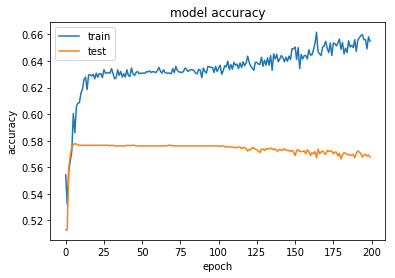

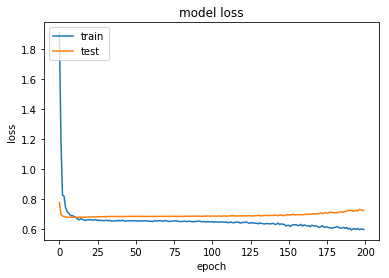

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# confution matrix

In [115]:
from sklearn import metrics
testYY=np.empty(0)
for i in testY:
    testYY=np.append(testYY,np.argmax(i))
predict_y=model.predict_classes(testX)
print("confusion matrix:")
print(metrics.confusion_matrix( testYY,predict_y))


print()
print("classification report:")
target_names = ['up','none','down']
print(metrics.classification_report(testYY,predict_y))

metrics.classification_report
print("label_up",test[test['label_up']==1].shape[0])
print("label_none",test[test['label_none']==1].shape[0])
print("label_down",test[test['label_down']==1].shape[0])

confusion matrix:
[[1297   50]
 [ 961   30]]

classification report:
             precision    recall  f1-score   support

        0.0       0.57      0.96      0.72      1347
        1.0       0.38      0.03      0.06       991

avg / total       0.49      0.57      0.44      2338

label_up 836
label_none 936
label_down 566


In [114]:
close_index=df.columns.get_loc('Close')
open_index=df.columns.get_loc('Open')
date_index=df.columns.get_loc('Date')

pram_buymode="BUY"
flag,BUY=0,0
MONEY=1000000
BUY_MONEY=1000000
BUY=0
resulst_out=""
LEN=len(df_num)
GRAPH_X=[]
GRAPH_Y=[]

start=len(trainX)
end=len(df2_num)-1
print("start:",df2_num[start,0],"〜end:",df2_num[end,0])

standard=1000000/df2_num[start,1]  
DATE=""
result_out=""

df_sim = pd.DataFrame( columns=['Date', 'Open', 'Close', 'Up', 'money','result','predict','正誤','利益率'] )

NameError: name 'df_num' is not defined

In [ ]:
for i in range(start,end): 
        PRE=df2_num[i,np.array([
            
                               3,4,5,
                               6,7,8,
                               9,10,11,
                               12,13,14,
                               15,16,17,
                               18,19,20,
                               21,22,23,
                               24,25,26,
                               27,28,29,
                               30,31,32,

                               33,34,35,
                               36,37,38,
                               39,40,41,
                               42,43,44,
                               45,46,47,
                               48,49,50,
                               51,52,53,
                               54,55,56,
                               57,58,59,
                               60,61,62,
                               ])]
        
        #予測のコマンド
        PRE2 = model.predict_proba(np.resize(PRE,(1,trainX.shape[1])),verbose=0)
        PRE2=PRE2[0]
        
        profit_rate=0
        DATE2=df2_num[i,date_index]
        if DATE != DATE2[:7]:       #月初の定点観測
            DATE=DATE2[:7]
            print()
            resulst_out=resulst_out+"\n"
            if DATE2[5:7]=="01":
                print("--------------------------------------------------------------------")
                resulst_out=resulst_out+"--------------------------------------------------------------------"+"\n"
            STRING=df2_num[i,0]+":資金"+"{:,}".format(int(MONEY))+"(基準"+"{:,}".format(int(standard*df2_num[i,1])).strip()+")"
            print(STRING.strip(),end="")
            result_out=result_out+STRING.strip()+"\n"



        if pram_buymode=="":

            # 買うシグナルにて、現金(BUY=0)から保持(BUY=1)。売るシグナルにて、保持(BUY=1)から現金(BUY=0)。
            #label_up     0  #label_none   1  #label_down   2
            
            if PRE2[0]>PRE2[1] and PRE2[0]>PRE2[2] and BUY==0:
                STRING="買"+DATE2[8:10]+"d"
                print("",STRING.strip(),end="")
                result_out=result_out+STRING.strip()
                

                BUY=1
                BUY_MONEY=df2_num[i,1] #df2.iloc[i,1]    



            if PRE2[2]>PRE2[1] and PRE2[2]>PRE2[0] and BUY==1:
                STRING="売"+DATE2[8:10]+"d("+"{:.1f}".format(int(df2_num[i,1]/BUY_MONEY*100-100))+"%)"
                print("",STRING.strip(),end="")
                result_out=result_out+STRING.strip()

                BUY=0
                #MONEY=df2_num[i,1]/df2_num[i,2]*MONEY
                MONEY=df2_num[i,1]/BUY_MONEY*MONEY
        else:
            # BUY_modeの場合
            # 1. Open時に、AIが売り(buy)と買い(sell)かを選択
            # 2. close時に、その反対を行い、利益確定をする。
            #label_up     0  #label_none   1  #label_down   2

            PREDICT    ="None"
            
            
            #  売り予測の場合
            if PRE2[2]>0.4:
            #if PRE2[0,0]>PRE2[0,1] and PRE2[0,0]>PRE2[0,2] :
                PREDICT="sell"
                #print("売:",end=" ")
                profit_rate=df2_num[i,open_index]/df2_num[i, close_index]
                MONEY=(profit_rate)*MONEY
                
    

            #  買い予測の場合
            #elif PRE2[0,2]>PRE2[0,1] and PRE2[0,2]>PRE2[0,0] :
            if PRE2[0]>0.4:
                PREDICT="buy"
                #print("買",end=" ")
                profit_rate=df2_num[i,close_index]/df2_num[i,open_index]
                MONEY=(profit_rate)*MONEY

            
            

        if df2_num[i,63]==1:
            Y_result="buy"
        elif df2_num[i,65]==1:
            Y_result="sell"
        else:
            Y_result="None"
            
        seigo="×"    
        if Y_result==PREDICT:
            seigo="●"
        
        if profit_rate!=0:
            profit_rate=100*(profit_rate-1)
        
        s1 = pd.Series([df2_num[i,0],                 #日付
                        round(df2_num[i,open_index], 2),        #OPEN
                        round(df2_num[i,close_index],2),        #Close
                        round((df2_num[i,close_index]/df2_num[i,open_index]-1)*100,2),  #アップ率
                        round(MONEY),
                        Y_result,PREDICT,seigo,
                        round(profit_rate,2)],                     #予測
               index=df_sim.columns)
        df_sim=df_sim.append(s1,ignore_index=True)

In [28]:
# ファイルの保存
df_sim
df_sim.to_csv('data/simulation.csv',index=False)

In [29]:
print("●",df_sim[df_sim['正誤']=="●"].shape)
print("X",df_sim[df_sim['正誤']=="×"].shape)

● (910, 9)
X (1427, 9)


In [12]:
df_sim[['利益率']].sum()


利益率    186.2
dtype: float64

# 年毎の利益率の計算


In [48]:
for i in range(1,19):
    YEAR=str(i+2000)
    start=YEAR+"年01月01日"
    end=YEAR+"年12月31日"

    tmp=df_sim.query("Date >= @start and Date <= @end ")
    
    print("{:}年の利益率{:.2f}%".format(YEAR,tmp[['利益率']].sum()[0]))

2001年の利益率0.00%
2002年の利益率0.00%
2003年の利益率0.00%
2004年の利益率0.00%
2005年の利益率0.00%
2006年の利益率0.00%
2007年の利益率0.00%
2008年の利益率0.00%
2009年の利益率13.20%
2010年の利益率28.39%
2011年の利益率28.88%
2012年の利益率12.71%
2013年の利益率64.22%
2014年の利益率14.92%
2015年の利益率-1.89%
2016年の利益率28.34%
2017年の利益率3.27%
2018年の利益率-5.84%


In [56]:
print("buy",df_sim[df_sim['predict']=='buy'].shape[0])
print("sell",df_sim[df_sim['predict']=='sell'].shape[0])

buy 1051
sell 18


In [61]:
print('buy',df_sim[df_sim['result']=='buy'].shape[0])
print('sell',df_sim[df_sim['result']=='sell'].shape[0])


buy 836
sell 566
